In [14]:
import numpy as np
from scipy.fft import fft2
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter       

a=np.random.randn(8,8)
a=gaussian_filter(a,1)

fourier_transform = fft2(a)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

magnitude_spectrum = np.abs(fourier_transform_shifted)



0.8365372702673798
0.26319711538392165 0.28912213008873044


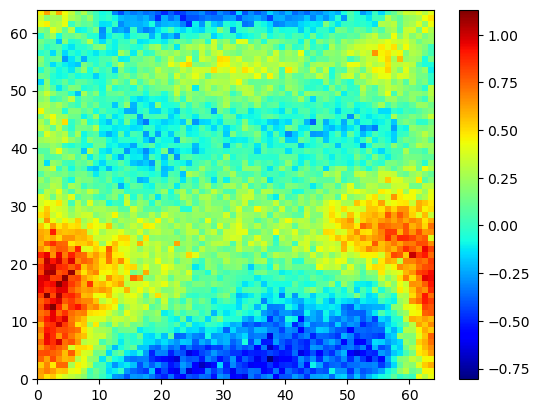

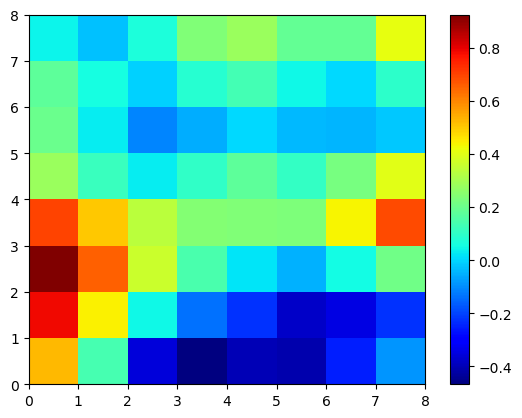

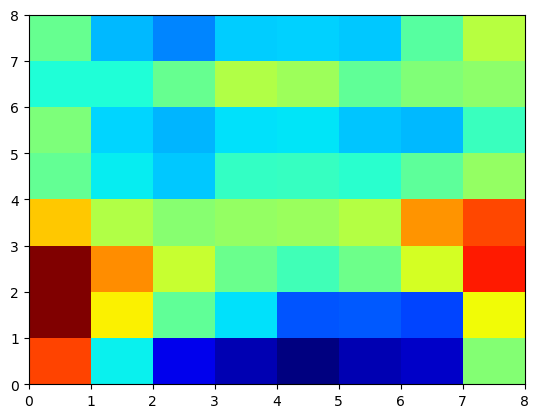

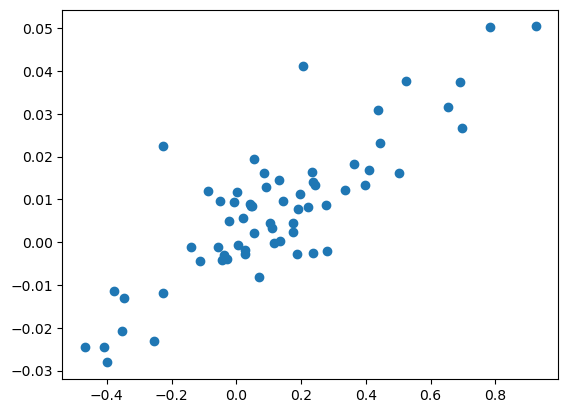

In [21]:
#plt.pcolormesh(magnitude_spectrum,cmap='jet')
#fourier_transform_shifted
a4=np.zeros((64,64),dtype=complex)
a4.real=np.random.randn(64,64)*0.1
a4.imag=np.random.randn(64,64)*0.1
a4[28:36,28:36]=fourier_transform_shifted
a4_unshifted=np.fft.ifftshift(a4)
a4_real=np.real(np.fft.ifft2(a4_unshifted))

plt.pcolormesh(a4_real*64,cmap='jet')
plt.colorbar()
plt.figure()
plt.pcolormesh(a,cmap='jet')
plt.colorbar()
a4_avg=np.zeros((8,8))
for i in range(8):
    for j in range(8):
        a4_avg[i,j]=a4_real[i*8:(i+1)*8,j*8:(j+1)*8].mean()
plt.figure()
plt.pcolormesh(a4_avg,cmap='jet')
print(np.corrcoef(a.flatten(),a4_avg.flatten())[0,1])
plt.figure()
plt.scatter(a.flatten(),a4_avg.flatten()*4)
print(a4_avg.std()*64,a.std())

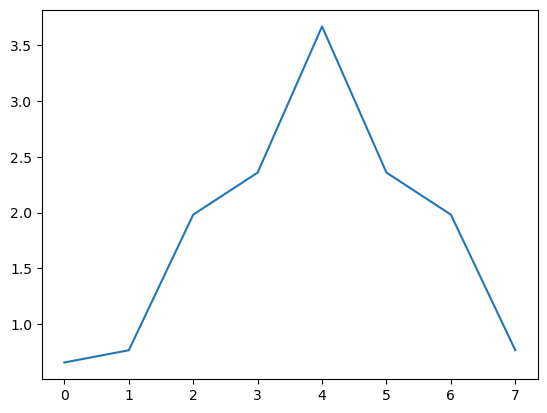

In [19]:
plt.plot(magnitude_spectrum.mean(axis=1))